In [ ]:
import pandas as pd

RNAseq_df = pd.read_csv('/Users/keerthana/Documents/NUS Precision Med 25/5005/5005_Project/Processed Datasets/gene.csv', sep=',', header=0)
RNAseq_df.head()

In [ ]:
annotation_df = pd.read_csv("/Users/keerthana/Documents/NUS Precision Med 25/5005/5005_Project/Processed Datasets/gene_annotation.csv")
annotation_df.head()

In [ ]:
# transpose RNAseq_df for probe IDs become rows
transposed_RNAseq_df = RNAseq_df.set_index('ID_REF').T

# merge operation using probe IDs as keys
merged_RNAseq_df = transposed_RNAseq_df.merge(annotation_df[['ID', 'Gene Symbol']], left_index=True, right_on='ID', how='left')

# set Gene Symbol as index, drop gene_annotation ID column and rename Gene Symbol to ID
merged_RNAseq_df.set_index('Gene Symbol', inplace=True)
merged_RNAseq_df.drop('ID', axis=1, inplace=True)
merged_RNAseq_df.index.name = 'ID_REF'
# transpose back to original format
annotated_RNAseq_df = merged_RNAseq_df.T

annotated_RNAseq_df.head()


In [ ]:
# drop NaN columns from df
columns_to_drop = annotated_RNAseq_df.columns[pd.isnull(annotated_RNAseq_df.columns)]
Final_annotated_RNAseq_df = annotated_RNAseq_df.drop(columns_to_drop, axis=1)

# split each column name on '///', keep the first part, and strip any leading/trailing spaces (clean up of column headers)
Final_annotated_RNAseq_df.columns = [name.split('///')[0].strip() for name in Final_annotated_RNAseq_df.columns]

#print(Final_annotated_RNAseq_df.columns)
Final_annotated_RNAseq_df.head()


In [ ]:
print(Final_annotated_RNAseq_df.index)


In [ ]:
cohort = pd.read_csv("/Users/keerthana/Documents/NUS Precision Med 25/5005/5005_Project/Processed Datasets/cohort.csv")
cohort.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# order of the subtypes
subtype_order = ['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7']

# hist
sns.countplot(data=cohort, x='SUBTYPES', order=subtype_order, palette='coolwarm' )
plt.title('Distribution of Subtypes')
plt.xlabel('Subtype')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels to make them readable if necessary
plt.show()



In [ ]:
# filter out rows where 'SUBTYPES' column is 'Not classified'
cohort_filtered = cohort.loc[cohort['SUBTYPES'] != 'Not classified']

# Display the filtered DataFrame
print(cohort_filtered)

In [ ]:
# Assuming 'ID_REF' is the index for Final_annotated_RNAseq_df after transposition and cleaning
rna_seq_cols = set(Final_annotated_RNAseq_df.columns.tolist())
cohort_cols = set(['ID_REF', 'SUBTYPES'])  # Explicitly what you're merging in

# Check for overlap in column names (excluding the merge keys themselves)
overlap_cols = rna_seq_cols.intersection(cohort_cols)
print(f"Overlapping columns (excluding merge keys): {overlap_cols}")


In [ ]:
# merging subtypes from cohort df to transposed RNA_seq_df
AML_subtype_df = Final_annotated_RNAseq_df.merge(cohort[['ID_REF','SUBTYPES']], left_index=True, right_on='ID_REF', how='left')

#fix for issue with column indexing
columns = ['ID_REF', 'SUBTYPES'] + [col for col in AML_subtype_df.columns if col not in ['ID_REF', 'SUBTYPES']]
AML_subtype_df = AML_subtype_df[columns]


AML_subtype_df.head()

#print(AML_subtype_df.columns)

In [ ]:
# Function to rename duplicate columns
def rename_duplicates( old_cols ):
    seen = set()
    for item in old_cols:
        fudge = 1
        newitem = item
        while newitem in seen:
            fudge += 1
            newitem = "{}_{}".format(item, fudge)
        yield newitem
        seen.add(newitem)

# Apply renaming to your DataFrame columns to ensure uniqueness
AML_subtype_df.columns = list(rename_duplicates(AML_subtype_df.columns))


In [ ]:
# Re-merge using an explicit approach, ensuring 'ID_REF' from cohort is used for merge without duplication
AML_subtype_df = Final_annotated_RNAseq_df.merge(cohort[['ID_REF','SUBTYPES']].drop_duplicates('ID_REF'), left_index=True, right_on='ID_REF', how='left')

# Apply the function to handle any unintended duplicate columns resulting from the merge
AML_subtype_df.columns = list(rename_duplicates(AML_subtype_df.columns))

#fix for issue with column indexing
columns = ['ID_REF', 'SUBTYPES'] + [col for col in AML_subtype_df.columns if col not in ['ID_REF', 'SUBTYPES']]
AML_subtype_df = AML_subtype_df[columns]

In [ ]:
AML_subtype_df.head()

In [ ]:
#encoding the subtypes
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
AML_subtype_df['SUBTYPES'] = label_encoder.fit_transform(AML_subtype_df['SUBTYPES'])
AML_subtype_df.head()

In [ ]:
AML_subtype_df.to_csv("//Users/keerthana/Documents/NUS Precision Med 25/5005/5005_Project/Processed Datasets/AML.csv", index=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


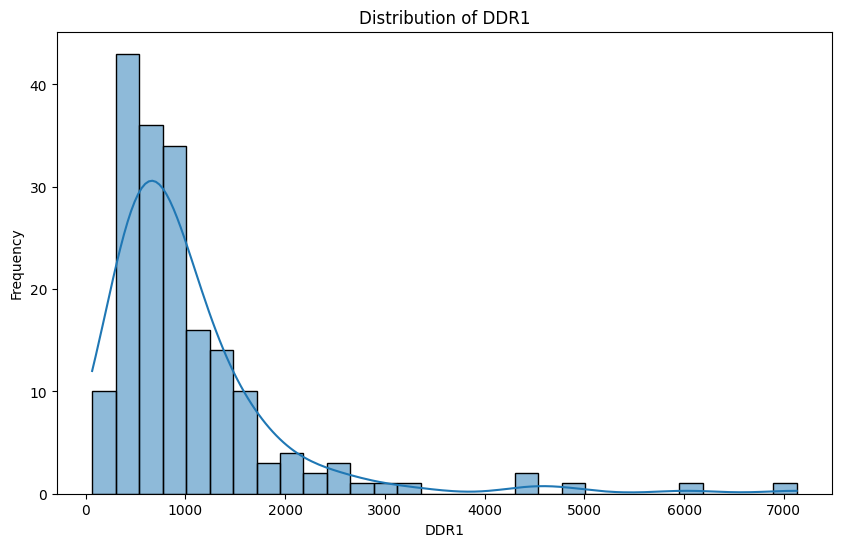

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


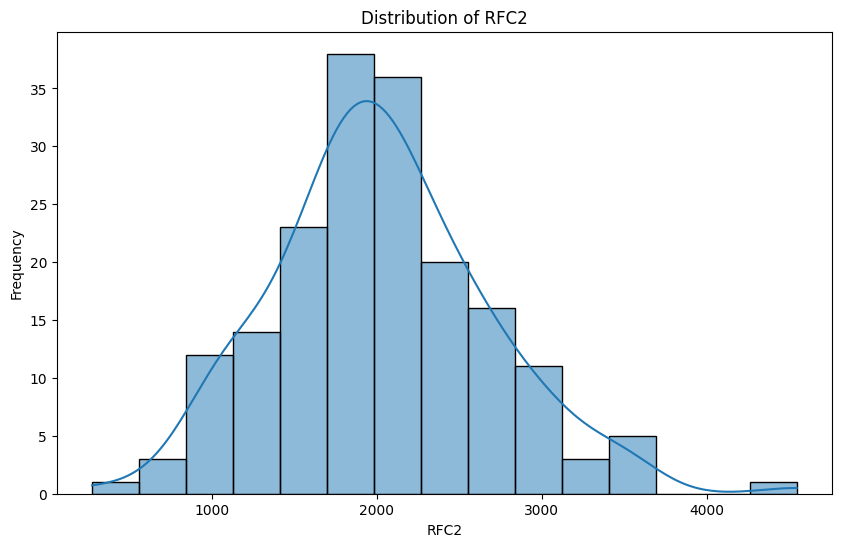

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


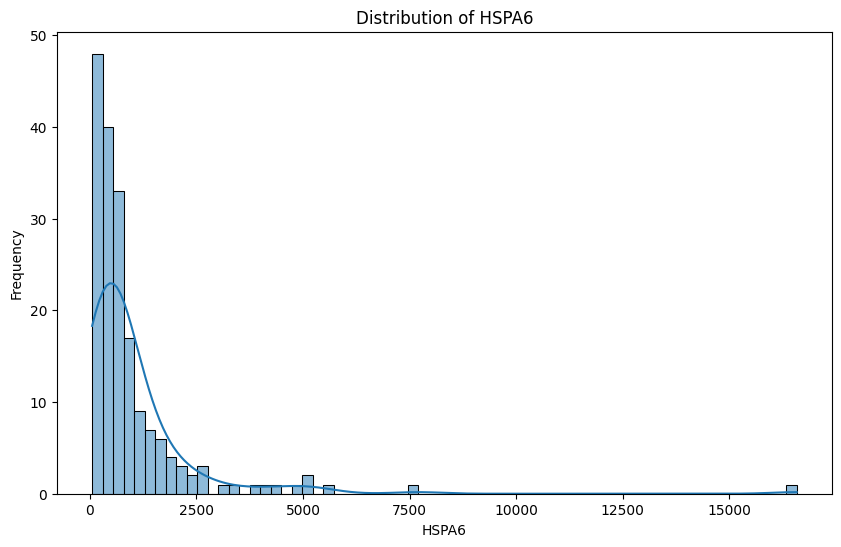

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
aml_RNAseq = pd.read_csv("/kaggle/input/aml-april8/AML (1).csv")

# sample first 3 gene expression (features) for visualization
sample_features = aml_RNAseq.columns[2:5]

# plots for distribution of selected features
for feature in sample_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(aml_RNAseq[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

- From these charts we can see the data are not normally distributed, needed to be normalized

In [ ]:
import numpy as np
# Apply log transformation to all feature columns except 'ID_REF' and 'SUBTYPES'
features = aml_RNAseq.drop(['ID_REF', 'SUBTYPES'], axis=1)
df_log_transformed = np.log1p(features)

# Now, let's include the non-feature columns back for a complete dataset
df_log_transformed['ID_REF'] = aml_RNAseq['ID_REF']
df_log_transformed['SUBTYPES'] = aml_RNAseq['SUBTYPES']

for feature in sample_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_log_transformed[feature], kde=True)
    plt.title(f'Log Transformed Distribution of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
df_log_transformed.to_csv('/Users/keerthana/Documents/NUS Precision Med 25/5005/5005_Project/Processed Datasets/ori_log_transformed.csv', index=False)


In [ ]:
df_log_transformed_noID = df_log_transformed.drop(['ID_REF'], axis=1)

In [ ]:
import pandas as pd

df = pd.read_csv('/kaggle/input/aml-april8/AML (1).csv')
df.head()

In [9]:
import numpy as np

# Statistical Analysis & Machine Learning Packages/Libraries 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE # <--- Recursive Feature Eliminator
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr # <--- Pearson Correlation
from sklearn.feature_selection import SelectKBest, chi2 # <--- Chi-Squared Test
from sklearn.feature_selection import SelectKBest, f_classif # <--- Analysis of Variance
from sklearn.ensemble import RandomForestClassifier # <--- Random Forest Regressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.svm import SVC # <--  Support Vector Machine
import xgboost as xgb # <--  XGBoost
from sklearn.metrics import mean_squared_error
import sklearn.neighbors # <--- k-Nearest Neighbors
from sklearn.feature_selection import mutual_info_classif
from sklearn.neural_network import MLPClassifier # <--- Multi-Layer Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint
import sklearn.ensemble # <--- Soft Voting Machine
from sklearn.metrics import confusion_matrix

# Data Visualization Packages/Libraries 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.tree import plot_tree

# Miscellaneous Packages/Libraries 
import warnings
# from biothings_client import get_client
from sklearn.exceptions import ConvergenceWarning

# Hardcoded Values
random_state = 42 # <--- Random State
test_size = 0.3 # <--- Test/Train Split

kfold = KFold(n_splits = 6, shuffle = True, random_state = random_state) # <--- KFold
warnings.filterwarnings("ignore", category = ConvergenceWarning) # <--- Supress Warnings

In [10]:
# Feature Selection 
y = df['SUBTYPES'] # <--- Target (Case/Control)
x = df.drop(['SUBTYPES', 'ID_REF'], axis = 1) # <--- Features (Genomic/Clinical)
print(x.shape, y.shape)

(183, 14079) (183,)


In [11]:

# normalization
# log
x_log_transformed = np.log1p(x) 
x_bc_train, x_bc_test, y_bc_train, y_bc_test = train_test_split(x_log_transformed, y, test_size = test_size, random_state = random_state) # <-- Test/Train

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x is your DataFrame

# Select a subset of columns for visualization
subset_cols = x_bc_train.columns[:5]  # Choose the first 10 columns for example

# Create histograms for the selected columns

for col in subset_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(x_bc_train[col], kde=True, bins=20, label=col)

    plt.title('Distribution of Selected Columns{}'.format(col))
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.savefig('Distribution{}.png'.format(col))
    plt.show()


In [ ]:
#%%
# Pearson Correlation
person_correlations = [pearsonr(x_log_transformed[column], y) for column in x_log_transformed.columns] # <--- Calculate Pearson Correlation 

pearson_df = pd.DataFrame(person_correlations, columns=['Correlation Coefficient', 'p-value'], # <--- Generate p-values
                          index = x_log_transformed.columns).reset_index().rename(columns={'index': 'Gene_Name'}) # <--- Create Table 

pearson_df['Absolute Correlation Coefficient'] = np.abs(pearson_df['Correlation Coefficient']) # <--- Absolute Value

pearson_df_sorted = pearson_df.sort_values(by='Absolute Correlation Coefficient', 
                                    ascending = False).drop('Absolute Correlation Coefficient', axis = 1) # <--- Sort Table

pearson_df_significant = pearson_df_sorted[pearson_df_sorted['p-value'] < 0.05] # <--- Significance Filter 

pearson_df_significant # <--- Display Table

In [12]:
# Analysis of Variance
anova_features = SelectKBest(score_func = f_classif, k = 10).fit(x_log_transformed, y) # <--- Select 10 Features

anova_scores = pd.DataFrame(anova_features.scores_, columns=['F-Statistic']) # <--- Scores
anova_pvalues = pd.DataFrame(anova_features.pvalues_, columns=['p-value']) # <--- p-values
anova_labels = pd.DataFrame(x_log_transformed.columns, columns=['Gene_Name']) # Features

anova_df = pd.concat([anova_labels, anova_scores, anova_pvalues], axis = 1) # <--- Create Table
anova_df_sorted = anova_df.sort_values('F-Statistic', ascending = False) # <--- Sort Table
anova_df_significant = anova_df_sorted[anova_df_sorted['p-value'] < 0.05] # <--- Significance Filter 

anova_df_significant # <--- Display Table

,Gene_Name,F-Statistic,p-value
11584,ARHGAP4,36.553135,1.637794e-33
10055,MAP7_2,27.887587,1.424911e-27
10240,ANXA8_2,24.318363,7.830282e-25
9092,PRDX4,23.278968,5.363313e-24
10464,AP1S2_2,22.198460,4.145153e-23
...,...,...,...
10651,LPHN1,1.994728,4.965601e-02
8714,BCL2L2-PABPN1,1.993562,4.980018e-02
11649,CD44_4,1.993376,4.982318e-02
1811,CLDN20,1.993152,4.985093e-02


In [ ]:
# Chi-Squared Test
chisq_features = SelectKBest(score_func=chi2, k=10)  # <--- Select 10 Features
chisq_fit = chisq_features.fit(x_log_transformed, y)  # <--- Fit Chi-Squared

chisq_scores = pd.DataFrame(chisq_fit.scores_)  # <--- Scores
chisq_pvalues = pd.DataFrame(chisq_fit.pvalues_)  # <--- p-values
chisq_labels = pd.DataFrame(x_log_transformed.columns)  # <--- Features 

chisq_df = pd.concat([chisq_labels, chisq_scores, chisq_pvalues], axis=1)
chisq_df.columns = ['Gene_Name', 'Chi-Square Statistic', 'p-value']  # <--- Create Table 
chisq_df_sorted = chisq_df.sort_values(by=['Chi-Square Statistic'], ascending=False)  # <--- Sort Table
chisq_df_significant = chisq_df_sorted[chisq_df_sorted['p-value'] < 0.05]  # <--- Significance Filter 

chisq_df_significant  # <--- Display Table

In [ ]:
# Complete Merged Table
merged_df = (anova_df_sorted.merge(chisq_df_sorted, on='Gene_Name', how='outer')
                             .merge(pearson_df_sorted, on='Gene_Name', how='outer'))
merged_df.columns = ['Gene_Name', 
                     'F-Statistic', 'p-value (ANOVA)', 
                     'Chi-Square Statistic', 'p-value (Chi-Squared Test)', 
                     'Correlation Coefficient', 'p-value (Pearson Correlation)']
# merged_df.to_csv('/Users/TracyTao/Desktop/Singapore/NUS/PHM5005/ML/PHM5005/AML/Version4 Apr9/AML-Biomarker-Selection.csv', index = None)

In [ ]:
# Supported Biomarkers

biomarkers_df = anova_df_sorted.merge(chisq_df_sorted, on='Gene_Name').merge(pearson_df_sorted, on='Gene_Name')

biomarkers_df.columns = ['Gene_Name', 
                         'F-Statistic', 'p-value (ANOVA)', 
                         'Chi-Square Statistic', 'p-value (Chi-Squared Test)', 
                         'Correlation Coefficient', 'p-value (Pearson Correlation)'] # <--- Create Biomarkers Table

significant_biomarkers_df = biomarkers_df[(biomarkers_df['p-value (ANOVA)'] < 0.05) 
                                          & (biomarkers_df['p-value (Chi-Squared Test)'] < 0.05) 
                                          & (biomarkers_df['p-value (Pearson Correlation)'] < 0.05)] # <-- Filter 0.05 p-value


significant_biomarkers_list = significant_biomarkers_df['Gene_Name'].values # <-- Ensembl ID for ML/AI Analysis

#significant_biomarkers_list
# significant_biomarkers_df.to_csv('/Users/TracyTao/Desktop/Singapore/NUS/PHM5005/ML/PHM5005/AML/Version4 Apr9/AML-significant_biomarkers.csv', index = None)

In [ ]:
len(significant_biomarkers_list)

In [ ]:
significant_biomarkers_df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# Assuming data is stored in a pandas DataFrame called 'df'

# 1. Bar plot
plt.figure(figsize=(18, 6))
sns.barplot(x='Gene_Name', y='F-Statistic', data=significant_biomarkers_df)
plt.xticks(rotation=90)
plt.title('F-Statistic for Each Gene')
plt.savefig('FStatistic for Each Gene')
plt.show()

# 2. Scatter plot
plt.figure(figsize=(18, 6))
sns.scatterplot(x='F-Statistic', y='Correlation Coefficient', data=significant_biomarkers_df)
plt.title('Correlation Coefficient vs. F-Statistic')
plt.savefig('Correlation Coefficient vs FStatistic')
plt.show()

# 3. Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(significant_biomarkers_df[['F-Statistic', 'p-value (ANOVA)', 
                     'Chi-Square Statistic', 'p-value (Chi-Squared Test)', 
                     'Correlation Coefficient', 'p-value (Pearson Correlation)']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('Correlation Matrix')
plt.show()

# 4. Box plot
plt.figure(figsize=(18, 6))
sns.boxplot(x='Gene_Name', y='F-Statistic', data=significant_biomarkers_df)
plt.xticks(rotation=90)
plt.title('Distribution of F-Statistic for Each Gene')
plt.savefig('Distribution of FStatistic for Each Gene')
plt.show()


In [ ]:
# converting numpy array to list
sig_biomarkers_list_converted = significant_biomarkers_list.tolist()

columns_needed = sig_biomarkers_list_converted + ['SUBTYPES']

print(columns_needed)

In [ ]:
filtered_df = df[columns_needed].set_index(['SUBTYPES']).transpose()


# Using clustermap to show subtypes as a color-annotated row
sns.clustermap(filtered_df, figsize=(28, 28), 
               row_cluster=False, # Avoid clustering genes if you want them in the original order
               col_cluster=True,  # Cluster samples if desired
               cmap="viridis",    # Color map
               yticklabels=True,  # Show gene names
               xticklabels=False, # Hide sample names for clarity
               )
plt.savefig('clustermap to show subtypes.png')
plt.show()


In [ ]:
# ML/AI Analysis
y = df['SUBTYPES'] # <--- Target (Case/Control)
x_biomarker = x_log_transformed[significant_biomarkers_list] # <--- Features (Significant Biomarkers)

x_biomarker_train, x_biomarker_test, y_biomarker_train, y_biomarker_test = train_test_split(x_biomarker, y, test_size = test_size, random_state = random_state) # <--  Test/Train

x_biomarker_train.head()

In [ ]:
# Random Forest Classifier (with Hyperparameter Tuning)
rf = RandomForestClassifier(random_state = 42) # <--- Initialize RF 
rf.fit(x_biomarker_train, y_biomarker_train) # <--- Fit RF
rf_parameter_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

kfold = KFold(n_splits = 6 , shuffle = True, random_state = random_state) # <--- KFold

rf_best = GridSearchCV(
    rf, param_grid = rf_parameter_grid, cv = kfold,
    scoring = 'accuracy', n_jobs = -1, verbose = 0
) # <--- Hyperparameter Tuning 

rf_best.fit(x_biomarker_train, y_biomarker_train) # <--- Fit GridSearchCV
rf_best = rf_best.best_estimator_ # <--- Assign Best Estimator 
rf_best

In [ ]:
# Figure). Random Forest 
best_tree_index = np.argmax([tree.tree_.max_depth for tree in rf_best.estimators_])
best_tree = rf_best.estimators_[best_tree_index]

plt.figure(figsize=(28,28)) # <--- Figure Size
plot_tree(best_tree, filled=True, feature_names=significant_biomarkers_list.tolist(), class_names=None, rounded=True) # <--- Best Tree
plt.savefig('random forest best tree.png')
plt.show() # <--- Display Figure

In [ ]:
y_predict = rf_best.predict(x_biomarker_test)  # <--- Predict Target
rf_accuracy = accuracy_score(y_biomarker_test, y_predict)  # <--- Calculate Accuracy

y_probs = rf_best.predict_proba(x_biomarker_test)
y_probs = y_probs[:, 1]  # <--- Predict Positives Classes

rf_F1 = f1_score(y_biomarker_test, y_predict, average='weighted')  # <--- Weigthed-Average F1 Score

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Convert y_predict to one-hot encoding
lb = LabelBinarizer()
y_one_hot = lb.fit_transform(y_predict)

# Compute ROC AUC score for each class
roc_auc_scores = []
for i in range(y_one_hot.shape[1]):
    roc_auc_scores.append(roc_auc_score(y_one_hot[:, i], y_probs))
# Average the ROC AUC scores across all classes
avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)


print('Accuracy: ', rf_accuracy)
print("Average ROC AUC Score:", avg_roc_auc)
print('Weighted-Average F1 Score: ', rf_F1)

In [ ]:
# Support Vector Machine (with Hyperparameter Tuning)
svmc = SVC(kernel = 'linear', probability = True) # <--- Initialize SVM
svmc.fit(x_biomarker_train, y_biomarker_train) # <--- Fit SVM

svmc_parameter_grid = {
    "kernel": [ 'linear','rbf'],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'C': [0.01, 0.1, 1, 10, 50, 100, 500, 1000, 5000, 10000]
} # <--- Generate Parameter Grid

svmc_best = GridSearchCV(
    svmc, param_grid = svmc_parameter_grid, cv = kfold, 
    scoring = 'accuracy', n_jobs = -1, verbose = 0
) # <--- Hyperparameter Tuning 

svmc_best.fit(x_biomarker_train, y_biomarker_train) # <--- Fit GridSearchCV
# Get the best estimator
best_svmc_estimator = svmc_best.best_estimator_

svmc_best = svmc_best.best_estimator_ # <--- Assign Best Estimator 
svmc_best

In [ ]:
y_predict = svmc_best.predict(x_biomarker_test) # <--- Predict Target
svmc_accuracy = accuracy_score(y_biomarker_test, y_predict) # <--- Calculate Accuracy

y_probs = svmc_best.predict_proba(x_biomarker_test)
y_probs = y_probs[:, 1] # <--- Predict Positives Classes
# Convert y_predict to one-hot encoding
lb = LabelBinarizer()
y_one_hot = lb.fit_transform(y_predict)
# Compute ROC AUC score for each class
svm_roc_auc_scores = []
for i in range(y_one_hot.shape[1]):
    roc_auc_scores.append(roc_auc_score(y_one_hot[:, i], y_probs))
# Average the ROC AUC scores across all classes
svmc_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)

svmc_F1 = f1_score(y_biomarker_test, y_predict, average = 'weighted') # <--- Weigthed-Average F1 Score

print('Accuracy: ', svmc_accuracy)
print("Average ROC AUC Score:", svmc_avg_roc_auc)
print('Weighted-Average F1 Score: ', svmc_F1)

In [ ]:
# Figure). Support Vector Machine
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.abs(importance)
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + 0.5
    plt.figure(figsize=(6, 14)) # <--- Figure Size
    plt.barh(pos, feature_importance[sorted_idx], align = 'center')
    plt.yticks(pos, np.array(names)[sorted_idx]) 
    plt.xlabel('Relative Importance')
    plt.title(model_type + ' Feature Importance') # <--- Axes
    plt.savefig(model_type + ' Feature Importance.png')
    plt.show()  #<--- Display Figure

def remove_feature(feature_importance, feature_names, feature_to_remove):
    filtered_importance = [imp for imp, name in zip(feature_importance, feature_names) if name != feature_to_remove]
    filtered_names = [name for name in feature_names if name != feature_to_remove]
    return np.array(filtered_importance), np.array(filtered_names)

if svmc_best.kernel == 'linear':
    importance = svmc_best.coef_[0]
    feature_names = x_biomarker_train.columns
    feature_to_remove = 'ID'
    filtered_importance, filtered_names = remove_feature(importance, feature_names, feature_to_remove)
    plot_feature_importance(filtered_importance, filtered_names, 'SVM')

In [ ]:
# k-Nearest Neighbors (with Hyperparameter Tuning)
knn_classifier = sklearn.neighbors.KNeighborsClassifier() # <--- Initialize kNN
knn_model = knn_classifier.fit(x_biomarker_train, y_biomarker_train)  # <--- Fit kNN
n_samples = len(x_biomarker_train) 
max_neighbors = min(n_samples - 1, 30) 
leaf_size = list(range(1, 50)) 
n_neighbors = list(range(1, max_neighbors + 1)) # <--- Parameters from Samples, Standard Use
p = [1, 2] # <--- Manhattan, Euclidean Distance Metrics

knn_hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p = p) # <--- Hyperparametrs Dictionary
knn_best = GridSearchCV(knn_model, knn_hyperparameters, cv = kfold) # <--- Initialize GridSearchCV
knn_best = knn_best.fit(x_biomarker_train, y_biomarker_train) # <--- Fit GridSearchCV
knn_best
#jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000

In [ ]:
y_predict = knn_best.predict(x_biomarker_test) # <--- Predict Target
knn_accuracy = accuracy_score(y_biomarker_test, y_predict) # <--- Calculate Accuracy

y_probs = knn_best.predict_proba(x_biomarker_test)
y_probs = y_probs[:, 1] # <--- Predict Positives Classes

# Convert y_predict to one-hot encoding
lb = LabelBinarizer()
y_one_hot = lb.fit_transform(y_predict)
# Compute ROC AUC score for each class
knn_roc_auc_scores = []
for i in range(y_one_hot.shape[1]):
    knn_roc_auc_scores.append(roc_auc_score(y_one_hot[:, i], y_probs))
# Average the ROC AUC scores across all classes
knn_avg_roc_auc = sum(knn_roc_auc_scores) / len(roc_auc_scores)


knn_F1 = f1_score(y_biomarker_test, y_predict, average = 'weighted') # <--- Weigthed-Average F1 Score

print('Accuracy: ', knn_accuracy)
print('ROC-AUC: ', knn_avg_roc_auc)
print('Weighted-Average F1 Score: ', knn_F1)

In [ ]:
# Figure). k-Nearest Neighbors

feature_importance = mutual_info_classif(x_biomarker_train, y_biomarker_train)
normalized_importance = feature_importance / np.sum(feature_importance) 
sorted_idx = np.argsort(normalized_importance)[::-1] # <--- Normalized Feature Importance


plt.figure(figsize=(8, 16)) # <--- Figure Size 
plt.barh(range(x_biomarker_train.shape[1]), normalized_importance[sorted_idx], align = 'center')
plt.yticks(range(x_biomarker_train.shape[1]), x_biomarker_train.columns[sorted_idx])
plt.xlabel('Normalized Importance Score')
plt.title('k-Nearest Neighbors Feature Importance') # <--- Axes
plt.gca().invert_yaxis() # <--- Orientation 
plt.savefig('knn feature importance.png')
plt.show() # <--- Display Figure

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your original DataFrame containing the transcriptomic data
# and 'unique_biomarkers_df' contains the biomarkers with their subtypes.

# Prepare the target vector y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
x_biomarker_train, x_biomarker_test, y_biomarker_train, y_biomarker_test = train_test_split(x_biomarker, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss')

# Train the model
xgb_model.fit(x_biomarker_train, y_biomarker_train)

# Predict on the test set
y_pred = xgb_model.predict(x_biomarker_test)

# Calculate the accuracy
accuracy = accuracy_score(y_biomarker_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np

# Extreme Gradient Boosting (with Hyperparameter Tuning)
xgb_model = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', num_class=8)  # Initialize XGBoost
xgb_model.fit(x_train, y_train)  # Fit XGBoost

n_estimators_range = [int(x) for x in np.linspace(100, 500, 5)]
max_depth_range = [int(x) for x in np.linspace(3, 9, 4)]
gamma_range = [0.01, 0.1]
learning_rate_range = [0.001, 0.01, 0.1, 1]  # Parameters from Samples, Standard Use

xgb_parameter_grid = {
    "n_estimators": n_estimators_range,
    "max_depth": max_depth_range,
    "gamma": gamma_range,
    "learning_rate": learning_rate_range
}  # Generate Parameter Grid

kfold = 5  # Define k-fold cross-validation

xgb_best = GridSearchCV(
    estimator=xgb_model, param_grid=xgb_parameter_grid, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=0
)  # Hyperparameter Tuning

xgb_best.fit(x_train, y_train)  # Fit GridSearchCV
xgb_best = xgb_best.best_estimator_  # Assign Best Estimator 
xgb_best


In [ ]:
# Soft Voting Classifier
classifiers = [
    ('rf', rf_best),
    ('svmc', svmc_best),
#     ('xgb', xgb_model),
    ('knn', knn_best)
] # <-- Merge ML/AI Methods

hard_voting_classifier = sklearn.ensemble.VotingClassifier(classifiers, voting = 'hard') # <--- Initialize hard Voting
hard_voting_classifier.fit(x_biomarker_train, y_biomarker_train) # <--- Fit hard Voting
hard_voting_classifier

In [ ]:
y_predict = hard_voting_classifier.predict(x_biomarker_test) # <--- Predict Target
hard_voting_classifier_accuracy = accuracy_score(y_biomarker_test, y_predict) # <--- Calculate Accuracy
hard_voting_classifier_accuracy

In [ ]:
# Figure). Confusion Matrix
figure_size = (7, 7)
figure = plt.figure(figsize = figure_size) # <--- Figure Size

cm = confusion_matrix(y_biomarker_test, y_predict) # <--- Generate Confusion Matrix
ax = sns.heatmap(cm.T, square = True, annot = True, fmt = 'd', cbar = False, cmap='Blues')

figure_title = 'Confusion Matrix of AML Patient Case/Control Predictions'
plt.title(figure_title)  # <--- Figure Title
x_label = 'True Class'
plt.xlabel(x_label) # <--- Horizontal Axis Title
y_label = 'Predicted Class'
plt.ylabel(y_label) # <--- Vertical Axis Title

print(f'Model Accuracy: {hard_voting_classifier_accuracy}')
plt.savefig('Confusion Matrix.png')
plt.show() # <--- Display Figure

In [ ]:
# Figure). Algorithm Accuracies

def plot_algorithm_accuracies(accuracies, algorithm_names, title = 'Algorithm Prediction Accuracies'):
    plt.figure(figsize=(10, 6))
    plt.barh(algorithm_names, accuracies, align = 'center')
    plt.xlabel('Accuracy')
    plt.xlim(0, 1)
    plt.title(title)
    plt.savefig('accuracy comparison.png')
    plt.show()

accuracies = [knn_accuracy, 
              svmc_accuracy, 
              rf_accuracy,
             hard_voting_classifier_accuracy] # <--- Accuracy Variables
algorithms = ['k-Nearest Neighbors', 'SVM', 
              'Random Forest',
             'hard_voting_classifier_accuracy'] # <--- Algorithms 

plot_algorithm_accuracies(accuracies, algorithms) # <--- Display Figure

In [16]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming x_biomarker and y are your dataframes

# Convert dataframes to numpy arrays
x_np = x_log_transformed[anova_df_significant['Gene_Name']].to_numpy()
y_np = df['SUBTYPES'].to_numpy()

# Convert y to one-hot encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_np)
y_onehot = tf.keras.utils.to_categorical(y_encoded, num_classes=9)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_np, y_onehot, test_size=0.2, random_state=42)

# Convert numpy arrays to tensors
x_train_tensor = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_test_tensor = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((x_train.shape[1], 1), input_shape=(x_train.shape[1],)),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(256, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(9, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print('GPU is available. Training on GPU...')
    # Train the model on GPU
    with tf.device('/GPU:0'):
        history = model.fit(x_train_tensor, y_train_tensor, epochs=100, batch_size=128, validation_split=0.2)
else:
    print('GPU is not available. Training on CPU...')
    # Train the model on CPU
    history = model.fit(x_train_tensor, y_train_tensor, epochs=100, batch_size=128, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test_tensor, y_test_tensor)
print("Test Accuracy:", accuracy)

GPU is available. Training on GPU...
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.0690 - loss: 2.4008

W0000 00:00:1712639548.447463      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.0690 - loss: 2.4008 - val_accuracy: 0.2000 - val_loss: 32.3401
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.2328 - loss: 42.6362 - val_accuracy: 0.2333 - val_loss: 36.4861
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.2241 - loss: 39.0817 - val_accuracy: 0.1333 - val_loss: 7.1759
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.1897 - loss: 13.2299 - val_accuracy: 0.2333 - val_loss: 4.5547
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.1379 - loss: 6.5832 - val_accuracy: 0.2000 - val_loss: 2.5043
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.1552 - loss: 3.2956 - val_accuracy: 0.2333 - val_loss: 2.0693
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.1983 - loss: 2.1294 - val_accuracy: 0.2333 - val_loss: 2.0147
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.2414 - loss: 2.0602 - val_accuracy: 0.2333 - val_loss:

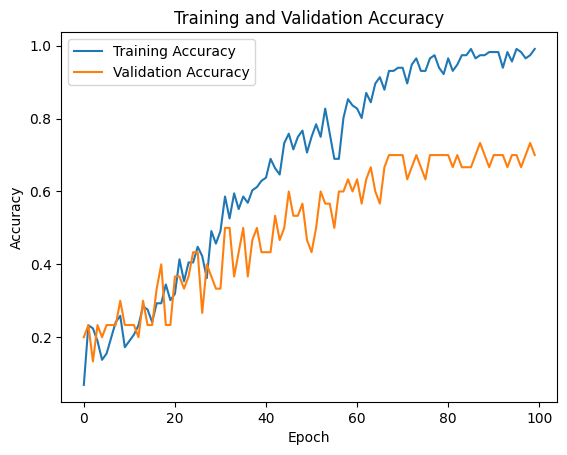

In [18]:
# Plot accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.savefig('CNN accuracy.png')
plt.show()
